In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df= pd.read_csv('Data.csv')
df

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


**Count specific values in each column**

In [153]:
for column in df.columns:
    print(df[column].value_counts())

Materials Id
mp-849394    1
mp-762648    1
mp-762827    1
mp-865154    1
mp-868335    1
            ..
mp-767356    1
mp-762751    1
mp-763389    1
mp-773761    1
mp-767320    1
Name: count, Length: 339, dtype: int64
Formula
LiFeSiO4           42
LiCoSiO4           29
Li2FeSiO4          15
Li2CoSiO4          14
Li2MnSiO4          12
                   ..
Li3Co2Si3O10        1
Li10Co(SiO5)2       1
Li4Co2Si3O10        1
Li2FeSi4O11         1
Li5Co4(Si3O10)2     1
Name: count, Length: 114, dtype: int64
Spacegroup
P1         72
P21/c      32
Pc         27
P21        23
Cc         16
C2/c       15
C2         12
Pna21      12
Pcmn        8
P21nb       8
Pnma        8
C2/m        6
C2221       6
Fdd2        6
Pbn21       6
C2cm        6
Pbca        6
Cmce        6
Pc21n       6
P212121     6
Pb21a       5
Pbnm        4
Pmnb        4
C222        3
P21nm       3
Pca21       3
Cmcm        3
P2/m        3
Imma        2
F2dd        2
P2          2
Pmn21       2
Pnca        2
Pm21n       2
P21/m  

**Important Features**

In [154]:
selected_column = df[['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)','Nsites','Volume','Crystal System']]
selected_column

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume,Crystal System
0,-2.699,0.006,3.462,16,178.513,monoclinic
1,-2.696,0.008,2.879,32,365.272,monoclinic
2,-2.775,0.012,3.653,28,301.775,monoclinic
3,-2.783,0.013,3.015,38,436.183,monoclinic
4,-2.747,0.016,2.578,36,421.286,monoclinic
...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,171.772,triclinic
335,-2.250,0.076,0.005,42,552.402,triclinic
336,-2.529,0.082,0.176,35,428.648,triclinic
337,-2.348,0.087,1.333,14,214.044,triclinic


**Data Visulization**

<Axes: xlabel='Crystal System', ylabel='count'>

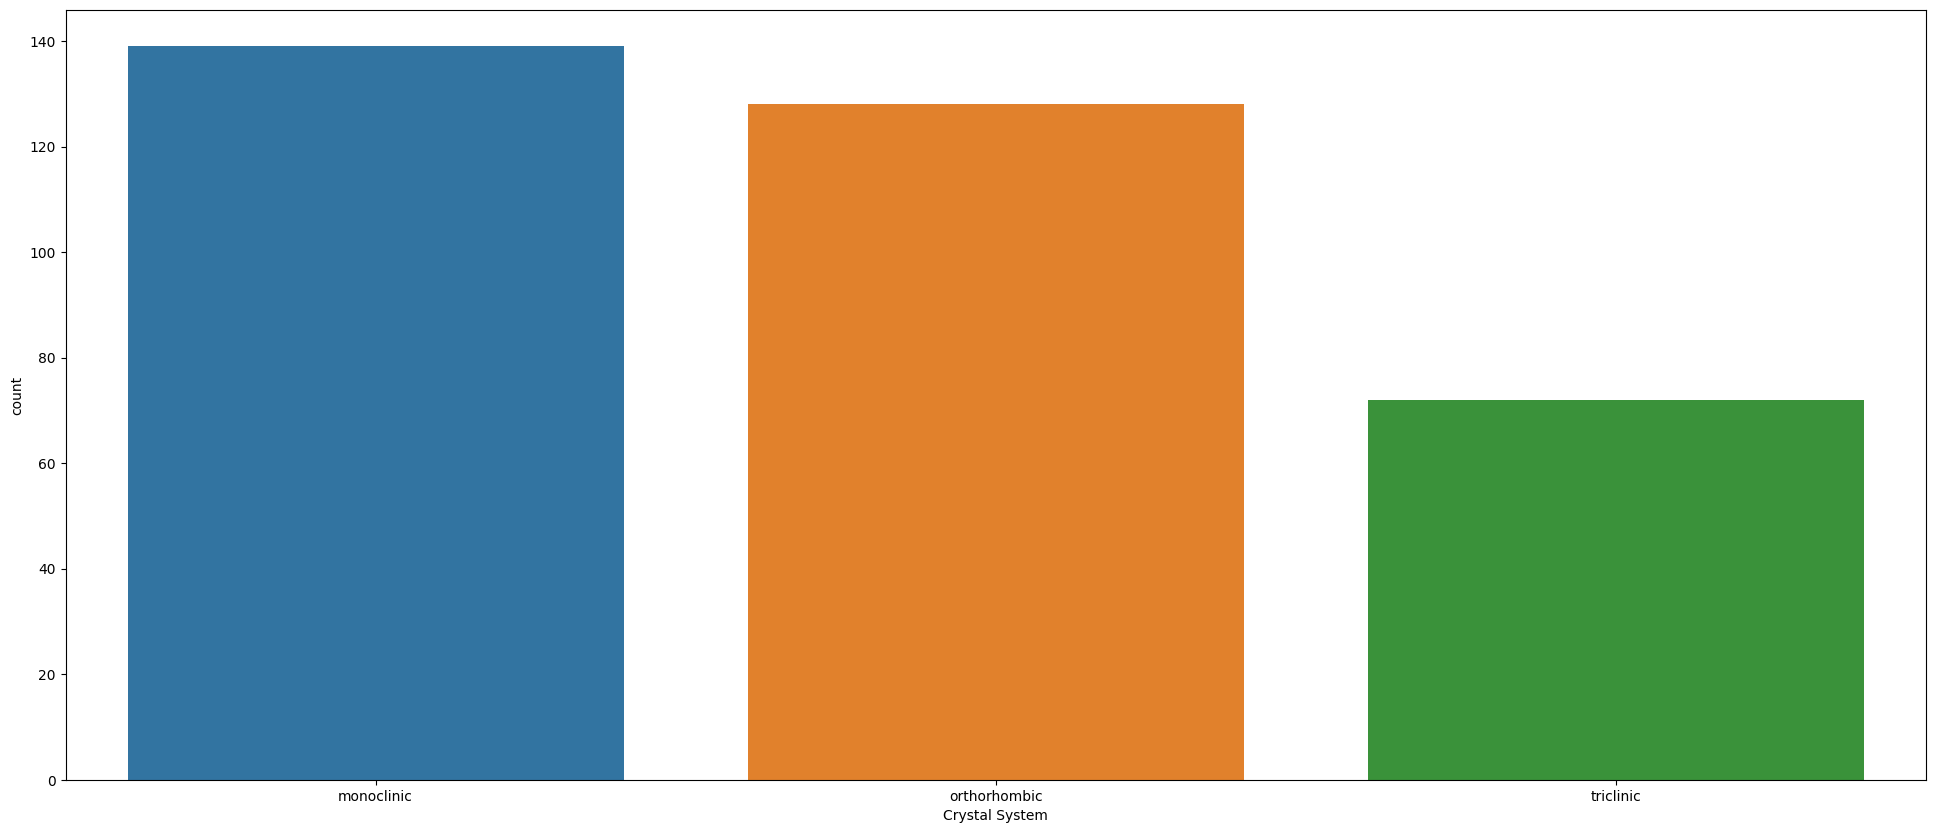

In [155]:
plt.figure(figsize=(24,10))
sns.countplot(x='Crystal System',data=df, hue='Crystal System')

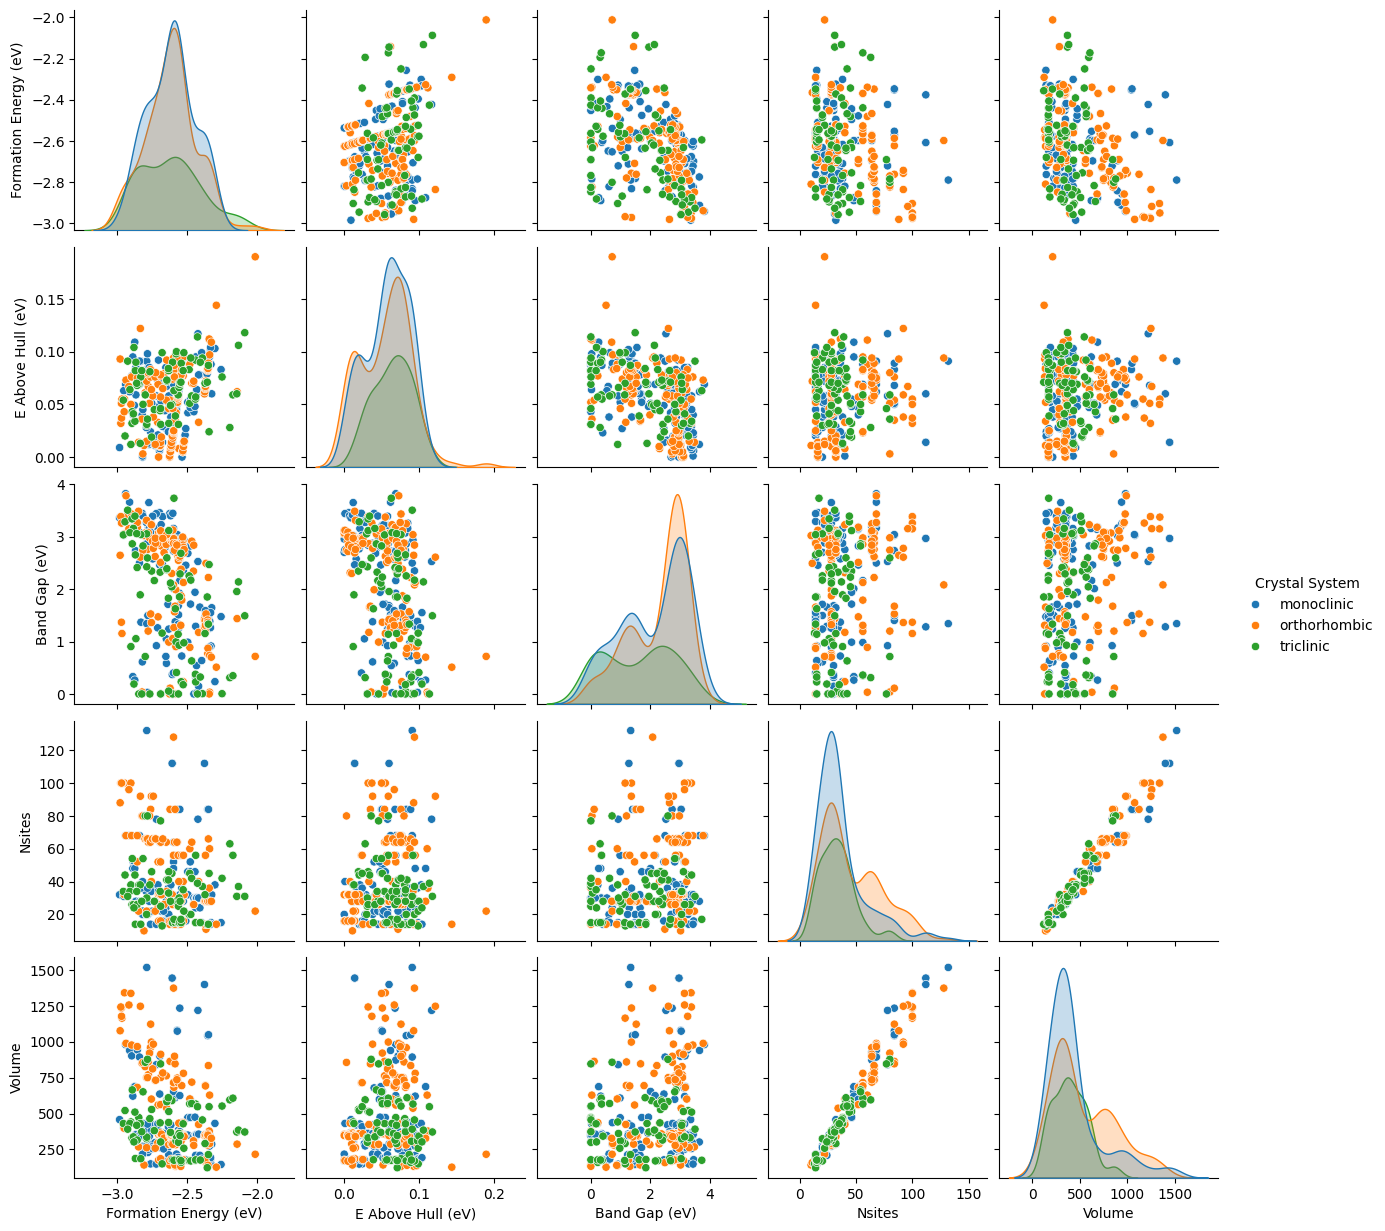

In [156]:
sns.pairplot(selected_column,hue='Crystal System')

**Box Plot**

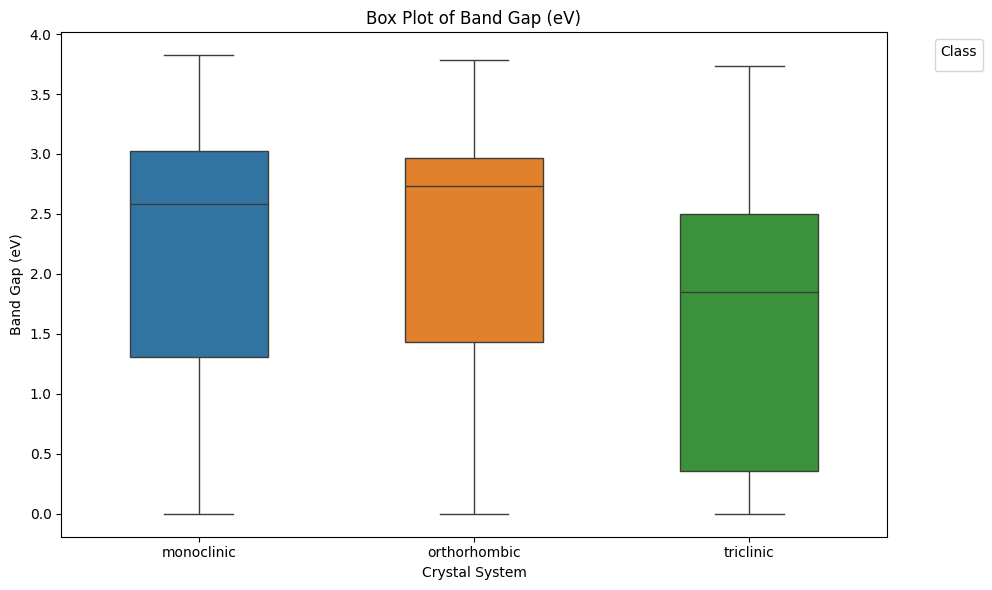

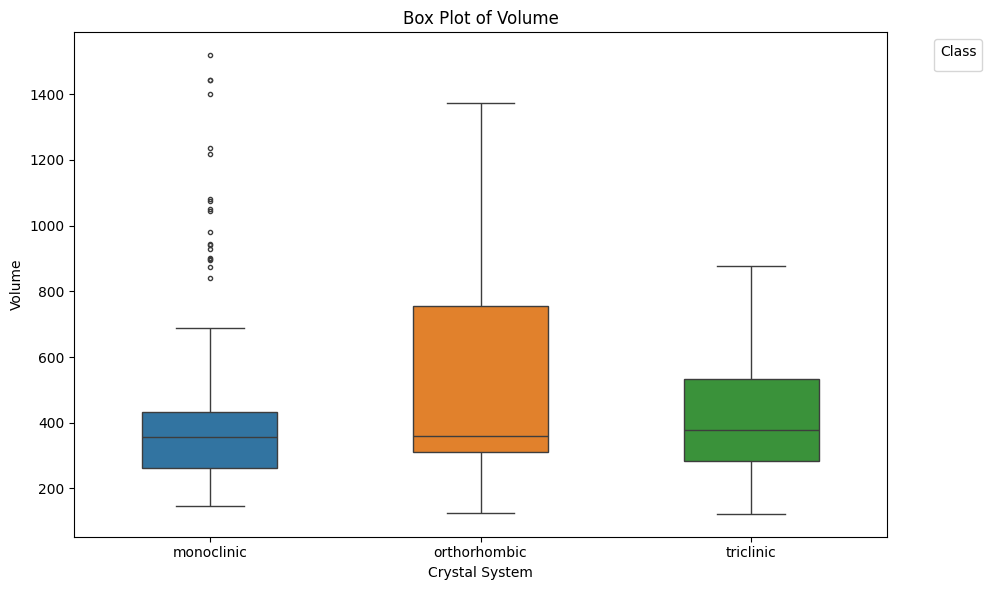

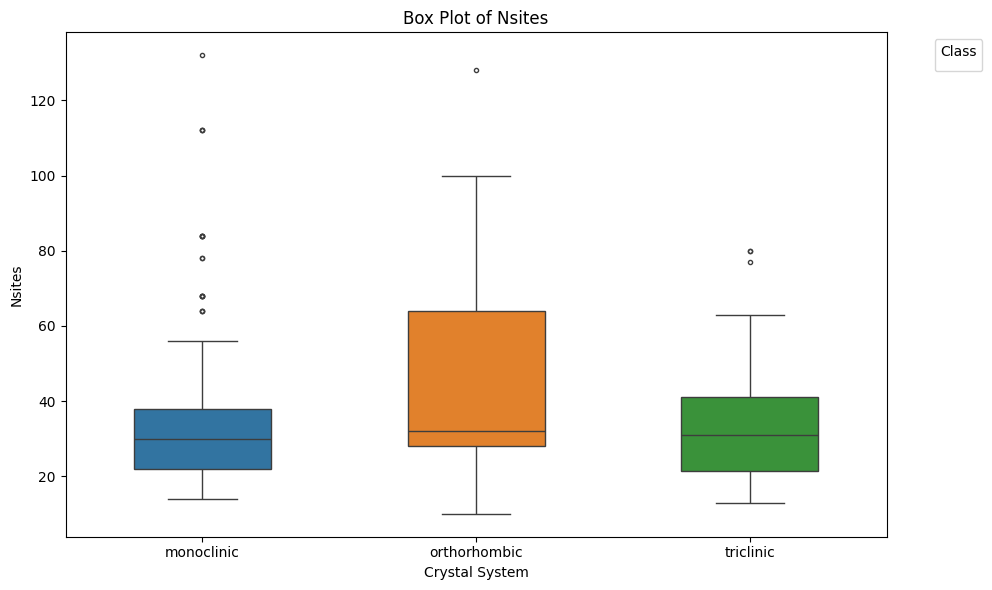

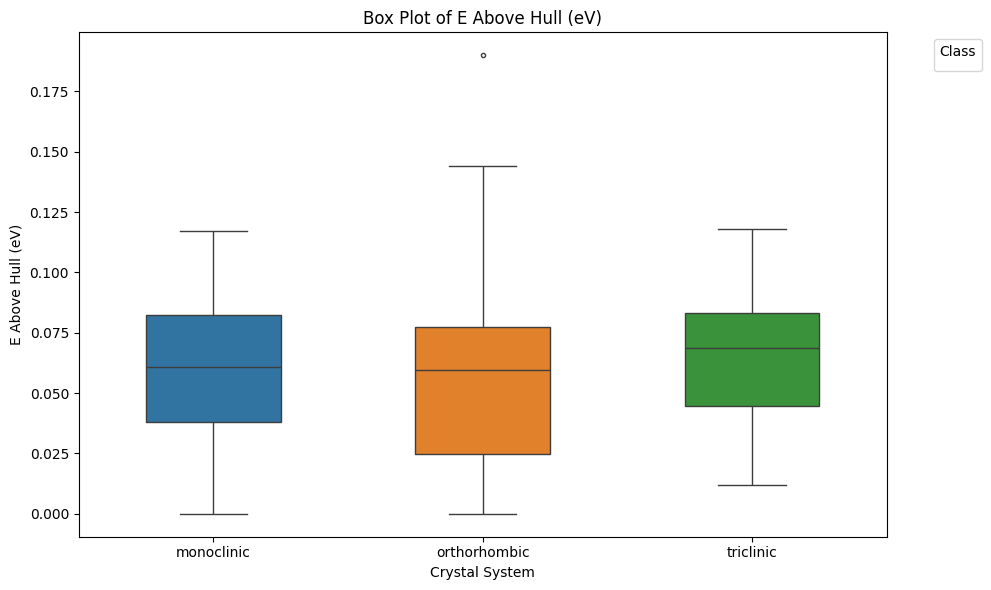

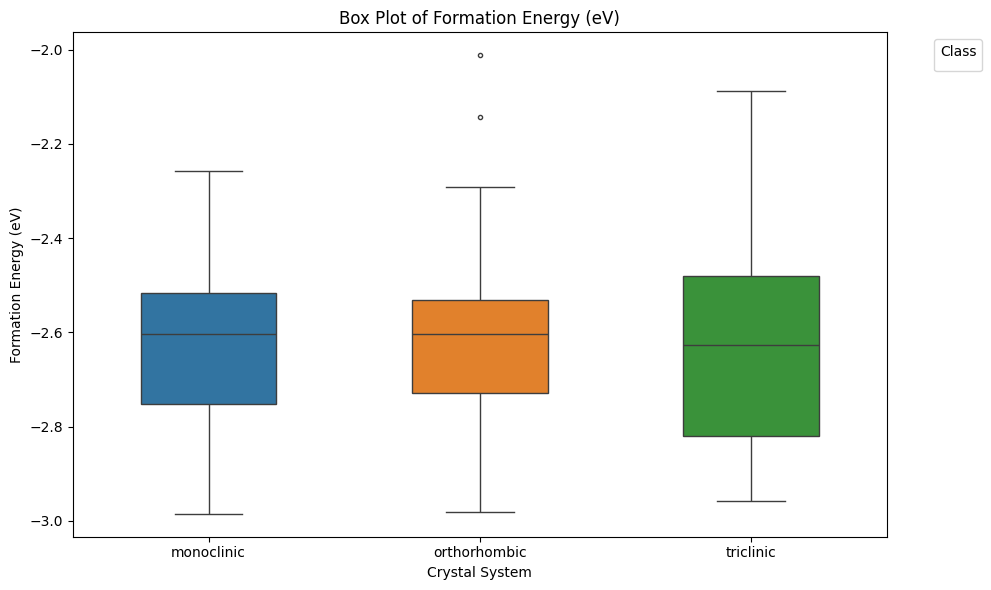

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to plot
features = ["Band Gap (eV)", "Volume", "Nsites", "E Above Hull (eV)", "Formation Energy (eV)"]

# Loop through each feature and create individual plots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=selected_column, y=feature, x="Crystal System", hue="Crystal System", width=0.5, fliersize=3)
    plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Crystal System')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


**Removing outliers using IQR method**

In [158]:
import pandas as pd
df2=selected_column.copy()


# Separate features and the target (last column)
features = df2.iloc[:, :-1]
target = df2.iloc[:, -1]

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_features = features[~((features < lower_bound) | (features > upper_bound)).any(axis=1)]

# Create the new DataFrame including the last column
selected_column = pd.concat([filtered_features, target[filtered_features.index]], axis=1)
selected_column


,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume,Crystal System
0,-2.699,0.006,3.462,16,178.513,monoclinic
1,-2.696,0.008,2.879,32,365.272,monoclinic
2,-2.775,0.012,3.653,28,301.775,monoclinic
3,-2.783,0.013,3.015,38,436.183,monoclinic
4,-2.747,0.016,2.578,36,421.286,monoclinic
...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,171.772,triclinic
335,-2.250,0.076,0.005,42,552.402,triclinic
336,-2.529,0.082,0.176,35,428.648,triclinic
337,-2.348,0.087,1.333,14,214.044,triclinic


**Correlation matrix**

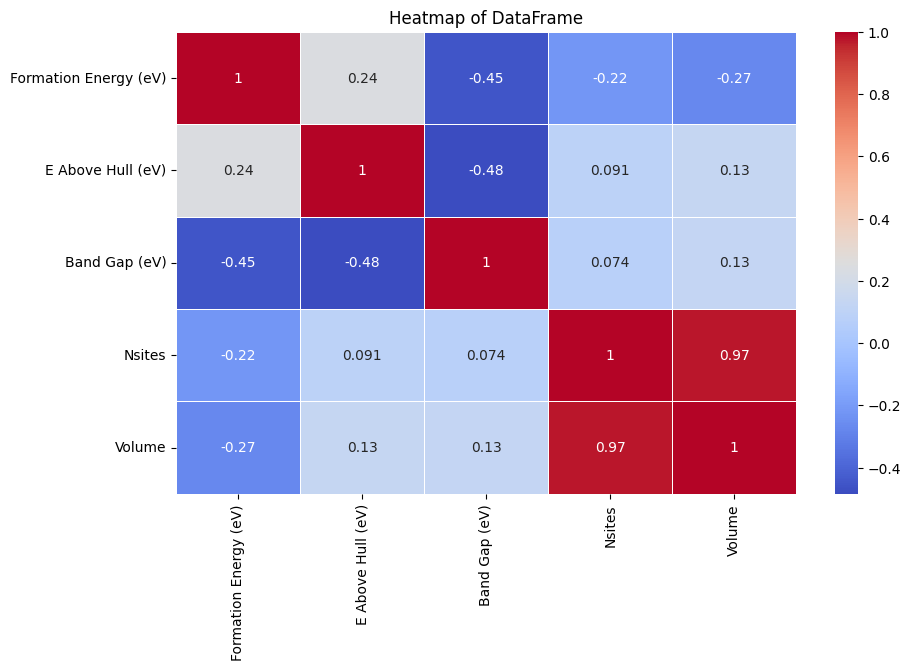

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_1_updated is your DataFrame and you want to leave out the last column
df_1=selected_column .iloc[:, :-1]

plt.figure(figsize=(10, 6))
sns.heatmap(df_1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of DataFrame')
plt.show()


In [160]:
#The categorical data columns can be converted to dummies and added to the original data frame:
T_dummy = pd.get_dummies(selected_column['Crystal System'],dtype=int)
selected_column = pd.concat([selected_column.drop('Crystal System',axis=1),T_dummy],axis=1)
selected_column



,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume,monoclinic,orthorhombic,triclinic
0,-2.699,0.006,3.462,16,178.513,1,0,0
1,-2.696,0.008,2.879,32,365.272,1,0,0
2,-2.775,0.012,3.653,28,301.775,1,0,0
3,-2.783,0.013,3.015,38,436.183,1,0,0
4,-2.747,0.016,2.578,36,421.286,1,0,0
...,...,...,...,...,...,...,...,...
334,-2.545,0.071,2.685,17,171.772,0,0,1
335,-2.250,0.076,0.005,42,552.402,0,0,1
336,-2.529,0.082,0.176,35,428.648,0,0,1
337,-2.348,0.087,1.333,14,214.044,0,0,1


In [161]:
X=selected_column.iloc[:, 0:5]
X

,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Volume
0,-2.699,0.006,3.462,16,178.513
1,-2.696,0.008,2.879,32,365.272
2,-2.775,0.012,3.653,28,301.775
3,-2.783,0.013,3.015,38,436.183
4,-2.747,0.016,2.578,36,421.286
...,...,...,...,...,...
334,-2.545,0.071,2.685,17,171.772
335,-2.250,0.076,0.005,42,552.402
336,-2.529,0.082,0.176,35,428.648
337,-2.348,0.087,1.333,14,214.044


**Scaling of Input data**

In [162]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.48795146, -1.73804264,  1.26517861, -1.07574793, -1.08603228],
       [-0.47001827, -1.67014865,  0.73609091, -0.16493828, -0.23836736],
       [-0.94225903, -1.53436067,  1.43851609, -0.3926407 , -0.52656862],
       ...,
       [ 0.52826283,  0.84192901, -1.71695208,  0.00583852,  0.0492847 ],
       [ 1.61023217,  1.01166399, -0.6669444 , -1.18959913, -0.92476357],
       [ 1.26352376,  1.11350497, -1.58354574, -1.13267353, -1.09649879]])

In [163]:
y=selected_column.iloc[:,5:8]
y = np.argmax(y.values, axis=1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

**SVM Model**

Training Accuracy: 0.8433734939759037
Test Accuracy: 0.5873015873015873
Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       104
           1       0.81      0.83      0.82        89
           2       0.91      0.91      0.91        56

    accuracy                           0.84       249
   macro avg       0.85      0.85      0.85       249
weighted avg       0.84      0.84      0.84       249

Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        27
           1       0.62      0.42      0.50        24
           2       0.50      0.50      0.50        12

    accuracy                           0.59        63
   macro avg       0.58      0.56      0.56        63
weighted avg       0.59      0.59      0.58        63

Confusion Matrix:
 [[21  2  4]
 [12 10  2]
 [ 2  4  6]]


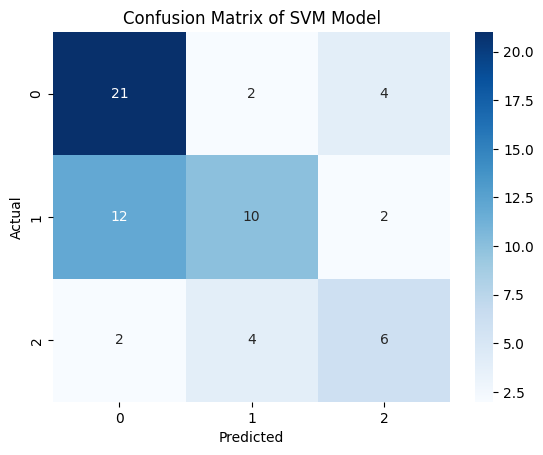

In [165]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

svm_model = SVC(kernel='rbf', C=1000, gamma=0.1)
svm_model.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate on test data
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Detailed performance
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM Model')
plt.show()

**KNN Model**

Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.74      0.68        27
           1       0.57      0.50      0.53        24
           2       0.70      0.58      0.64        12

    accuracy                           0.62        63
   macro avg       0.63      0.61      0.62        63
weighted avg       0.62      0.62      0.61        63

Confusion Matrix:
 [[20  6  1]
 [10 12  2]
 [ 2  3  7]]


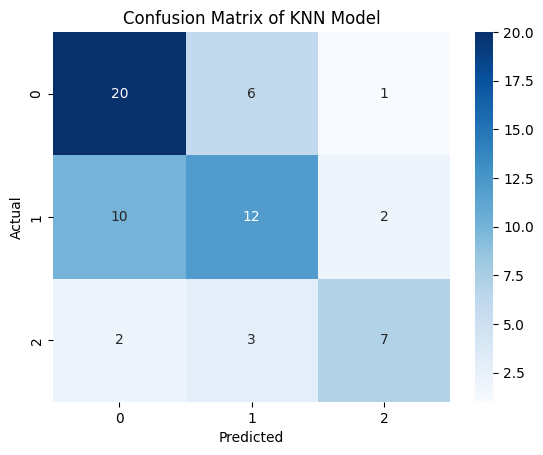

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN Model')
plt.show()

Text(0.5, 0, 'k_neighbour')

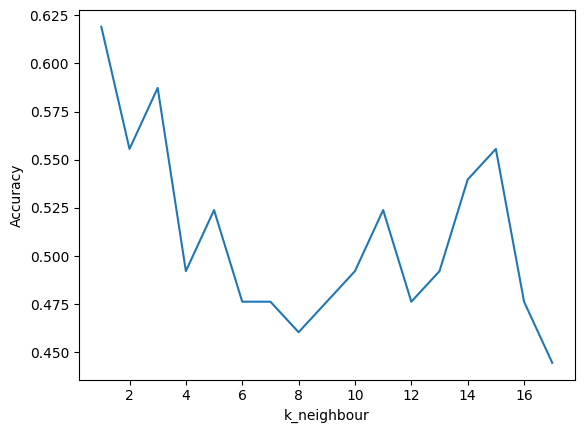

In [167]:
# calculate best k (n_neighbours) value
scores = []
for i in range(1,18):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(range(1,18),scores)
plt.ylabel('Accuracy')
plt.xlabel('k_neighbour')

**Random Forest**

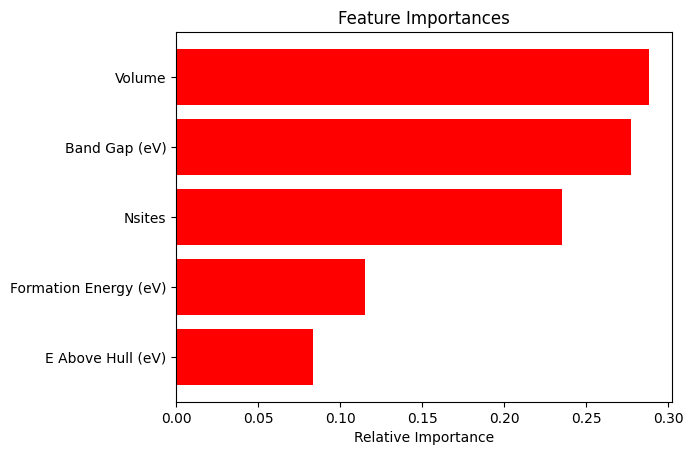

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cls = RandomForestClassifier(max_depth=2, random_state=10)
cls.fit(X_train, y_train)
importances = cls.feature_importances_
indices = np.argsort(importances)
features = selected_column.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest Accuracy: 0.70
Confusion Matrix:
 [[20  4  3]
 [ 8 15  1]
 [ 1  2  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71        27
           1       0.71      0.62      0.67        24
           2       0.69      0.75      0.72        12

    accuracy                           0.70        63
   macro avg       0.70      0.71      0.70        63
weighted avg       0.70      0.70      0.70        63



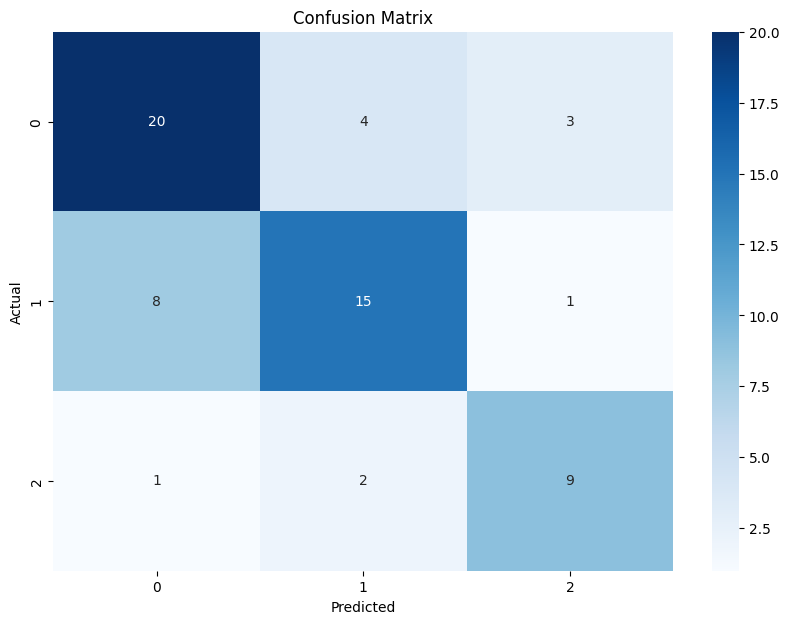

In [169]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Artificial neural network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 30)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 483 (1.89 KB)

 Trainable params: 483 (1.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.3786 - loss: 1.0967 - val_accuracy: 0.3651 - val_loss: 1.1110
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4183 - loss: 1.0672 - val_accuracy: 0.4127 - val_loss: 1.0972
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5047 - loss: 1.0393 - val_accuracy: 0.3968 - val_loss: 1.0881
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 1.0313 - val_accuracy: 0.4444 - val_loss: 1.0786
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4986 - loss: 1.0251 - val_accuracy: 0.4444 - val_loss: 1.0710
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5095 - loss: 1.0098 - val_accuracy: 0.4286 - val_loss: 1.0651
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4981 - loss: 0.9978 - val_accuracy: 0.4127 - val_loss: 1.0616
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4788 - loss: 1.0022 - val_accuracy: 0.4127 - val_loss: 1.0582
Epoch 9

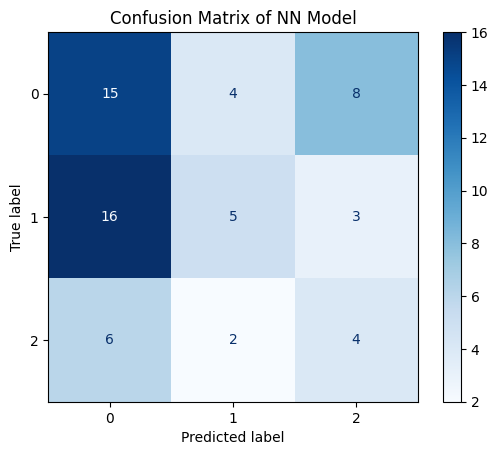

In [173]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Convert the labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)
y_test_one_hot = to_categorical(y_test, num_classes=3)

# Define the model
model = Sequential()
model.add(Dense(10, input_shape=(5,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train,y_train_one_hot, epochs=50, batch_size=32, validation_data=(X_test, y_test_one_hot))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices
y_test_classes = np.argmax(y_test_one_hot, axis=1)  # Get the true class indices

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(3))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix of NN Model')
plt.show()

